## Simulating noise on AWS Braket

In [1]:
# Use Braket SDK Cost Tracking to estimate the cost to run this example
from braket.tracking import Tracker
t = Tracker().start()

In [2]:
from qiskit.circuit import QuantumCircuit

from braket.aws import AwsDevice
from braket.circuits import Circuit, gates, noises, observables
from braket.devices import LocalSimulator
from braket.parametric import FreeParameter
from qiskit_braket_provider import AWSBraketProvider
from qiskit_braket_provider.providers import adapter

import numpy as np
from scipy.stats import unitary_group

##### Braket Circuit

In [3]:
# build a simple circuit
circ = Circuit().x(0)
print(circ)

T  : |0|
        
q0 : -X-

T  : |0|


In [4]:
# define a noise channel
noise = noises.BitFlip(probability=0.1)

# add noise to every gate in the circuit
circ.apply_gate_noise(noise)

# select the local noise simulator
device = LocalSimulator('braket_dm')

In [5]:
# run the circuit on the local simulator
task = device.run(circ, shots = 1000)

In [6]:
# visualize the results
result = task.result()
measurement = result.measurement_counts
print('measurement results:', measurement)

measurement results: Counter({'1': 894, '0': 106})


##### Qiskit Circuit

/Users/lukasvoss/anaconda3/envs/braket/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


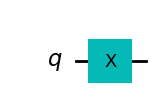

In [7]:
qiskit_circuit = QuantumCircuit(1)
qiskit_circuit.x(0)

qiskit_circuit.draw(output='mpl')

In [9]:
braket_circuit = adapter.convert_qiskit_to_braket_circuit(qiskit_circuit)

In [11]:
braket_circuit.apply_gate_noise(noise)

Circuit('instructions': [Instruction('operator': X('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': BitFlip(0.1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1)])

In [ ]:
braket_circuit_noisy = adapter.

In [5]:
# run the circuit on the local simulator
task = device.run(circ, shots = 1000)

In [6]:
# visualize the results
result = task.result()
measurement = result.measurement_counts
print('measurement results:', measurement)

measurement results: Counter({'11': 414, '00': 408, '10': 92, '01': 86})
